In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import sklearn

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("scikit-learn version:", sklearn.__version__)


Pandas version: 2.2.2
NumPy version: 1.26.4
scikit-learn version: 1.4.2


In [4]:
#loading the processed data file
df = pd.read_csv('processed_file.csv')

In [5]:
df.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,3,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,3,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,3,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [6]:
df['category'].value_counts()

category
3    533
0     28
2     23
1     21
4      7
Name: count, dtype: int64

In [7]:
df.shape

(612, 13)

In [8]:
x = df.drop('category' , axis = True)
y = df['category']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x, y , test_size= 0.2 , random_state= 43)
print(x_train.shape)
print(y_train.shape)

(489, 12)
(489,)


### 1. Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [12]:
#creating a decision tree model from entropy method. 
model = DecisionTreeClassifier(criterion="entropy",max_depth=5, random_state= 42)

In [13]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [14]:
a = model.score(x_test , y_test)  
print(f"Accuracy score for Decision Tree: {a:.3f}")

Accuracy score for Decision Tree: 0.894


In [15]:
cn = ['cirrhosis','fibrosis', 'hepatitis' ,'no_disease', 'suspect_disease']

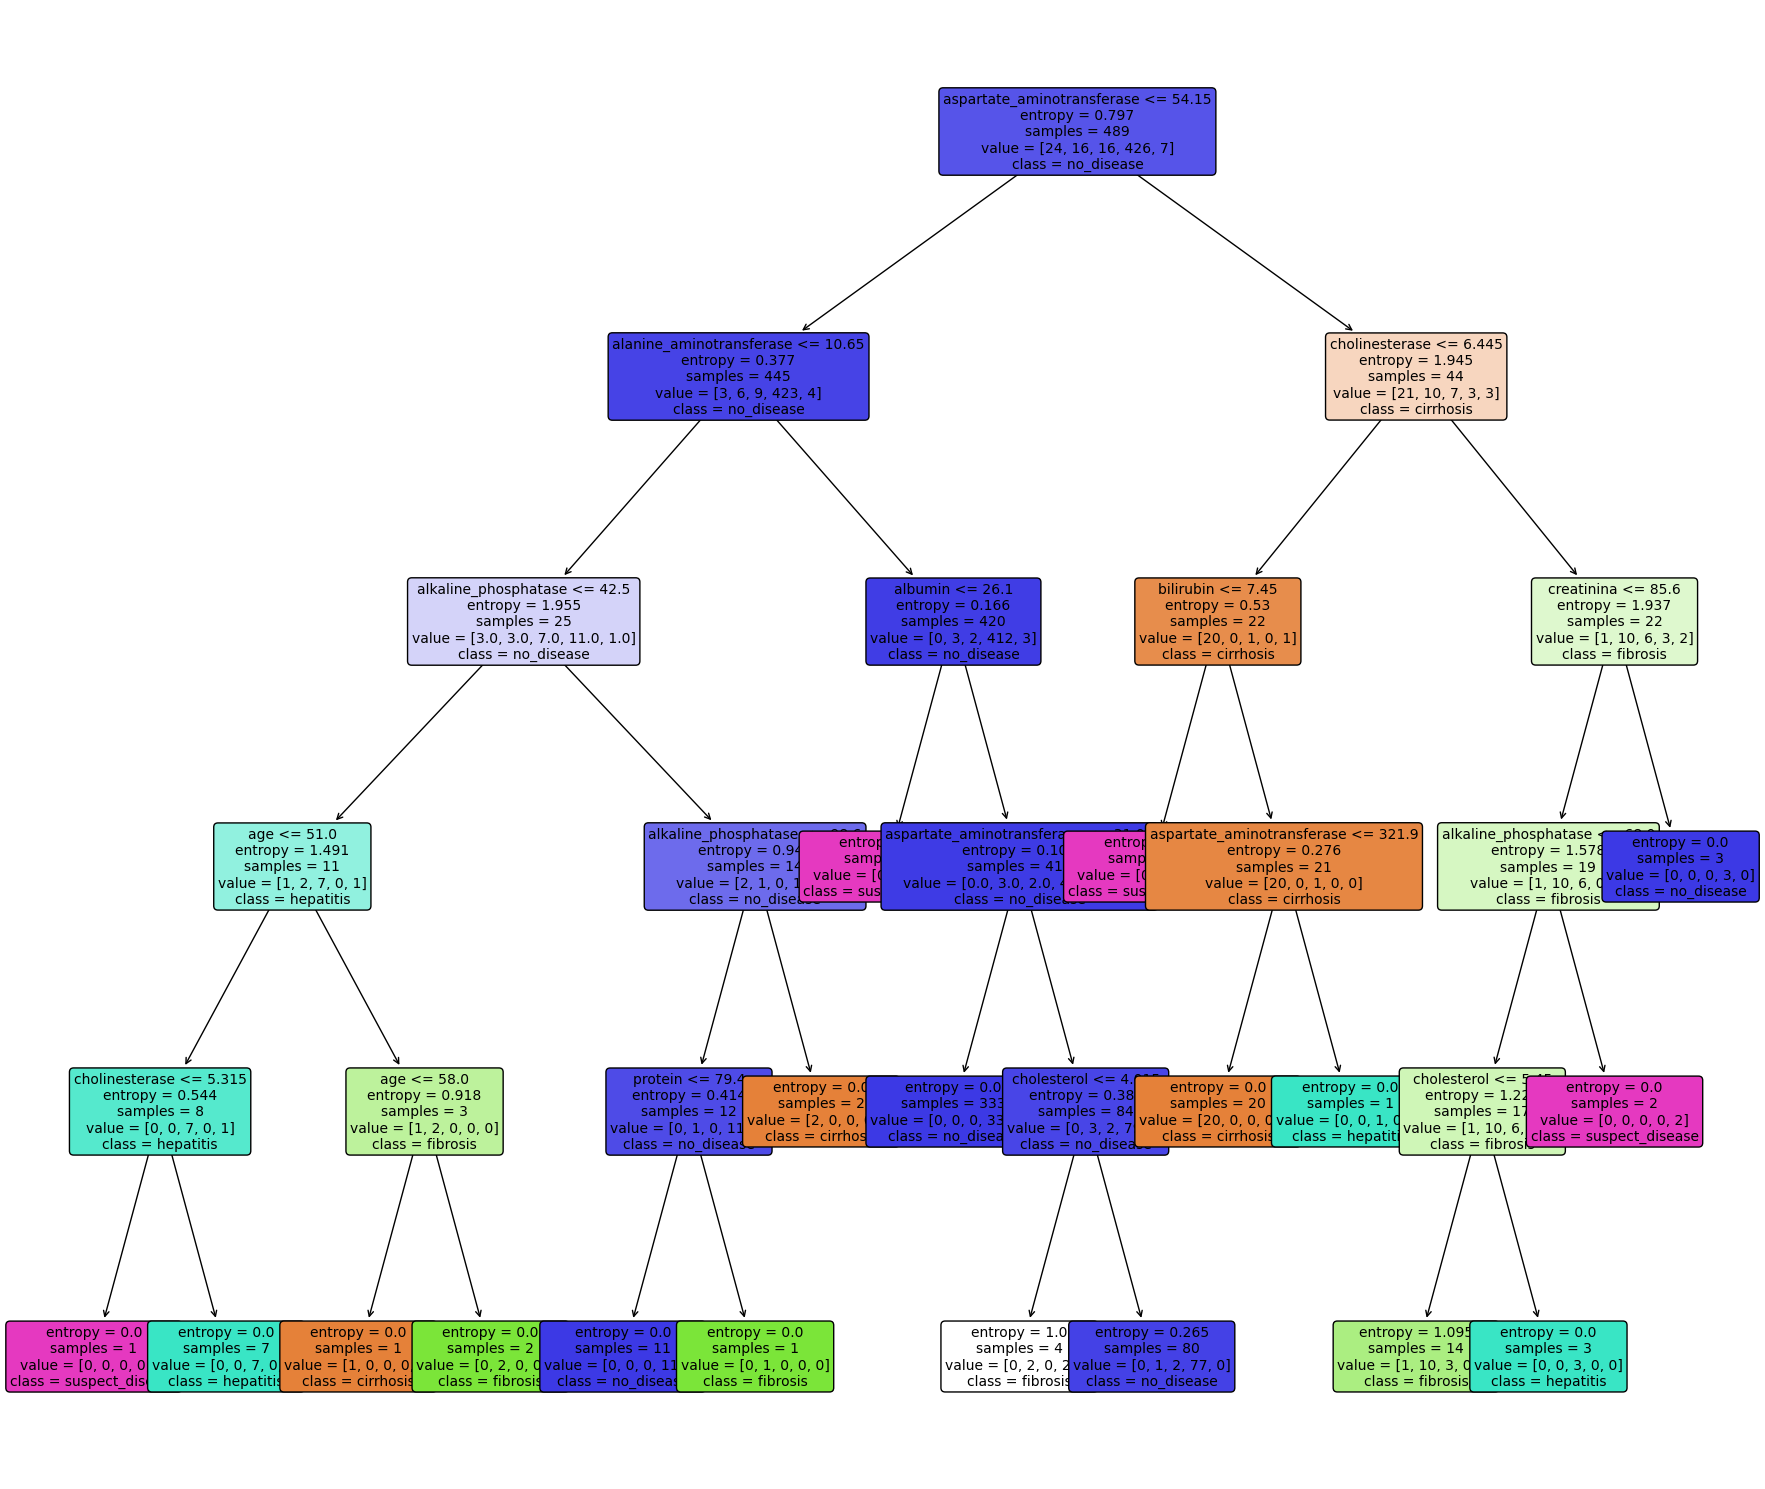

In [16]:
from sklearn import tree
plt.figure(figsize=(18,15))
tree.plot_tree(model, feature_names = x.columns , class_names= cn, fontsize= 10, filled = True , rounded = True)
plt.tight_layout()
plt.show()


### 2. Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state= 42)

In [19]:
#hyperParameter Tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50 ,75 , 100 , 200],
    'max_depth': [2,5,10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

In [20]:
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=5,        # 5-fold cross-validation
    n_jobs=-1, # Use all available cores
    verbose = 2
)

In [21]:
grid_search.fit(x_train, y_train)



Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 75, 100, 200]},
             verbose=2)

In [22]:
grid_search.cv_results_['mean_test_score']

array([0.90387124, 0.90387124, 0.90387124, 0.89976857, 0.90387124,
       0.90387124, 0.90387124, 0.89976857, 0.90387124, 0.90180938,
       0.90387124, 0.89976857, 0.90387124, 0.90387124, 0.90387124,
       0.89976857, 0.90387124, 0.90387124, 0.90387124, 0.89976857,
       0.90387124, 0.90387124, 0.90387124, 0.89976857, 0.9223017 ,
       0.92434252, 0.9223017 , 0.92434252, 0.92638334, 0.92434252,
       0.92026089, 0.92434252, 0.9223017 , 0.92026089, 0.91822007,
       0.9223017 , 0.92026089, 0.92023985, 0.91822007, 0.92026089,
       0.92228066, 0.91409636, 0.91819903, 0.92026089, 0.92228066,
       0.91409636, 0.91819903, 0.92026089, 0.92638334, 0.93046497,
       0.92842415, 0.92434252, 0.93048601, 0.92842415, 0.93252683,
       0.93046497, 0.9223017 , 0.92436356, 0.91822007, 0.92434252,
       0.91615822, 0.91819903, 0.91413844, 0.92638334, 0.92228066,
       0.91819903, 0.91819903, 0.92026089, 0.92228066, 0.91819903,
       0.91819903, 0.92026089])

In [23]:
# Best parameters and best score found
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.9325268251630549


In [24]:
rf_model =RandomForestClassifier(n_estimators= 100 , min_samples_split= 5 , min_samples_leaf= 1 , max_depth= 5 , random_state= 42 , oob_score= True)

In [25]:
rf_model.fit(x_train , y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, oob_score=True,
                       random_state=42)

In [26]:
b = rf_model.score(x_test, y_test)
print(f"Accuracy score for Random Forest is: {b:.3f}")

Accuracy score for Random Forest is: 0.902


In [27]:
print("OOB Score:", rf_model.oob_score_) 

OOB Score: 0.9263803680981595


##### The Out-Of-Bag (OOB) score is a useful measure of model performance specific to ensemble methods like Random Forests. It provides an unbiased estimate of the model's accuracy without needing a separate validation dataset.

#### 3. XGBM

In [30]:
##Model based on Extreme Gradient Boosting
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=3)


In [31]:
xgb_model.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [32]:
c = xgb_model.score(x_test, y_test)
print(f"Accuracy score for Extreme Gradient Boosting is : {c:.3f}")

Accuracy score for Extreme Gradient Boosting is : 0.894


### 4. LGBM


In [34]:
#model based on lightGBM 
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(objective = 'multiclass' , num_class = 5 ,learning_rate = 0.01 , num_leaves = 31 , max_depth = -1)

In [35]:
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 489, number of used features: 12
[LightGBM] [Info] Start training from score -3.014309
[LightGBM] [Info] Start training from score -3.419774
[LightGBM] [Info] Start training from score -3.419774
[LightGBM] [Info] Start training from score -0.137923
[LightGBM] [Info] Start training from score -4.246452
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

LGBMClassifier(learning_rate=0.01, num_class=5, objective='multiclass')

In [36]:
d = lgb_model.score(x_test, y_test)
print(f"Accuracy score for Light GBM: {d:.3f}")

Accuracy score for Light GBM: 0.911


In [37]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()

In [38]:
x_transformed = se.fit_transform(x)

In [39]:
x_transformed = pd.DataFrame(x_transformed , columns= x.columns)

In [40]:
from sklearn.model_selection import train_test_split
x_Train , x_Test , y_Train , y_Test = train_test_split( x_transformed , y, test_size= 0.2 , random_state= 42) 
print(x_Train.shape)
print(y_Train.shape)

(489, 12)
(489,)


### 5.KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
n = np.array(range(0,40))
params = dict(n_neighbors=n)

In [44]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=params, verbose = 0 , cv = 5)
grid.fit(x_Train, y_Train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])})

In [45]:
grid.cv_results_['mean_test_score']

array([       nan, 0.90801599, 0.90797391, 0.90799495, 0.91007785,
       0.91007785, 0.91007785, 0.90597517, 0.91009888, 0.90189354,
       0.90189354, 0.89776983, 0.89776983, 0.89983169, 0.89570797,
       0.89366716, 0.89366716, 0.89366716, 0.89162634, 0.88956449,
       0.88956449, 0.88548285, 0.88548285, 0.88548285, 0.88548285,
       0.88140122, 0.88140122, 0.88140122, 0.88140122, 0.88140122,
       0.88140122, 0.88140122, 0.87527877, 0.87527877, 0.87527877,
       0.87527877, 0.87527877, 0.87321692, 0.87321692, 0.87321692])

In [46]:
print(grid.best_score_)
print(grid.best_params_)

0.9100988849147906
{'n_neighbors': 8}


In [47]:
knn_model = KNeighborsClassifier(n_neighbors= 8)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [48]:
knn_model.score(x_Train, y_Train)

0.8732106339468303

In [49]:
e = knn_model.score(x_Test, y_Test)
print(f"Accuracy score for KNN: {e:.3f}")

Accuracy score for KNN: 0.862


### 6. SVM

In [81]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 5, 10], 
    'kernel': ['linear', 'rbf', 'poly'],
    'probability': [True]#kernel  options
}


In [83]:
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(x_Train, y_Train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'probability': [True]})

In [84]:
print("Best parameters found: ", grid.best_params_)
print("Best cross-validation score: ", grid.best_score_)

Best parameters found:  {'C': 1, 'kernel': 'linear', 'probability': True}
Best cross-validation score:  0.9284662318535661


In [85]:
# Evaluate the model with the best parameters on the test set
best_model = grid.best_estimator_
best_model

SVC(C=1, kernel='linear', probability=True)

In [89]:
grid.cv_results_['mean_test_score']

array([0.91822007, 0.87321692, 0.91005681, 0.92846623, 0.91615822,
       0.91415948, 0.91826215, 0.92432148, 0.91822007, 0.91418052,
       0.92023985, 0.92434252])

In [91]:
g = best_model.score(x_Test, y_Test)
print(f"Accuracy score for Support Vector Machines: {g:.3f}")

Accuracy score for Support Vector Machines: 0.943


### 7. Neural Networks

In [94]:
from sklearn.neural_network import MLPClassifier

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], #Number and size of hidden layers, which controls the model’s capacity
    'activation': ['relu' , 'tanh'], #relu is faster and widely used, while tanh can handle smaller data well.
    'solver': ['adam', 'sgd'],
    'alpha': [ 0.1, 0.01]}    # reduces overfitting by penalizing large weight


In [96]:
# Initialize the MLP Classifier
mlp = MLPClassifier(max_iter=200, random_state=42)

In [98]:
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_Train, y_Train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'], 'alpha': [0.1, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50)],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy')

In [99]:
# Display best parameters
grid_search.best_params_

{'activation': 'tanh',
 'alpha': 0.1,
 'hidden_layer_sizes': (50,),
 'solver': 'adam'}

In [100]:
N_model = grid_search.best_estimator_
N_model.fit(x_Train , y_Train)

MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(50,),
              random_state=42)

In [101]:
h = N_model.score(x_Test , y_Test)
print(f"Accuracy score for Neural Networks: {h:.3f}")

Accuracy score for Neural Networks: 0.943


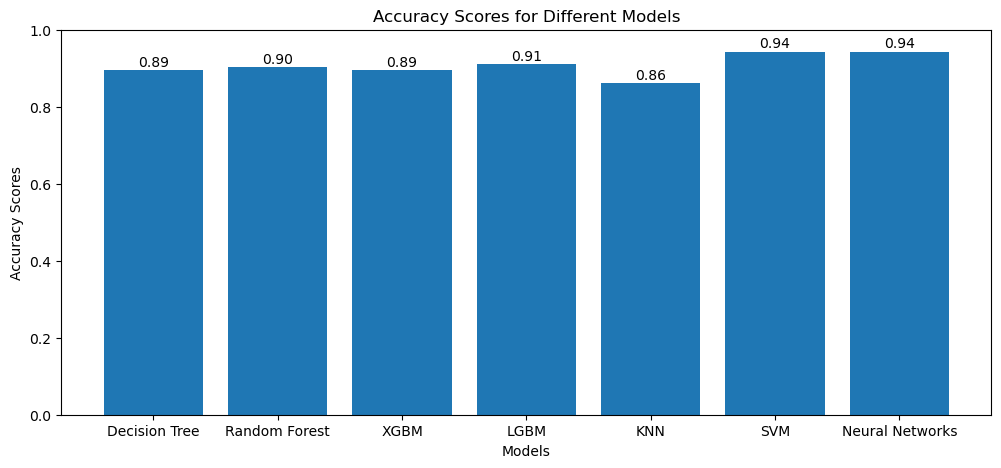

In [102]:
# List of model names and their corresponding accuracy scores
models = ['Decision Tree', 'Random Forest', 'XGBM', 'LGBM', 'KNN', 'SVM' , 'Neural Networks']
scores = [a, b, c, d, e, g, h]

# Create a bar chart
plt.figure(figsize=(12, 5))
plt.bar(models, scores)
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy

# Show the accuracy scores on top of the bars
for index, value in enumerate(scores):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center')

plt.show()

# Model Evaluation.

In [104]:
from sklearn.metrics import classification_report


#### SVM with 0.943  test accuracy

In [106]:
best_model.score(x_Train, y_Train)

0.9754601226993865

In [107]:
y_Pred = best_model.predict(x_Test)

In [108]:
print(classification_report(y_Test, y_Pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.57      1.00      0.73         4
           2       0.67      0.29      0.40         7
           3       0.98      0.99      0.99       106
           4       1.00      1.00      1.00         1

    accuracy                           0.94       123
   macro avg       0.80      0.82      0.78       123
weighted avg       0.94      0.94      0.94       123



In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
svm_cm = confusion_matrix(y_Test, y_Pred)

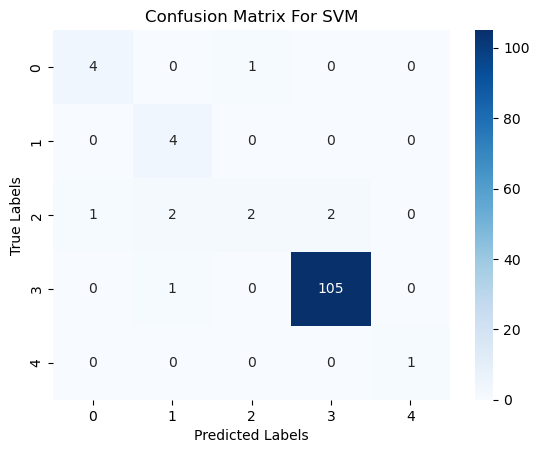

In [111]:
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For SVM')
plt.show()

### Neural Networks with 0.943 test accuracy

In [113]:
N_model.score(x_Train, y_Train)

0.967280163599182

In [114]:
y_Pred = N_model.predict(x_Test)

In [115]:
print(classification_report(y_Test, y_Pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.60      0.75      0.67         4
           2       1.00      0.43      0.60         7
           3       0.97      0.99      0.98       106
           4       0.00      0.00      0.00         1

    accuracy                           0.94       123
   macro avg       0.66      0.63      0.62       123
weighted avg       0.94      0.94      0.94       123



In [116]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [117]:
# Define pipeline with SMOTE oversampling
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', N_model)
])

# Fit the pipeline on your training data
pipeline.fit(x_Train, y_Train)

# Get predictions and evaluate
y_pred = pipeline.predict(x_Test)

In [118]:
print(classification_report(y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.43      0.75      0.55         4
           2       0.71      0.71      0.71         7
           3       0.98      0.95      0.97       106
           4       1.00      1.00      1.00         1

    accuracy                           0.93       123
   macro avg       0.78      0.84      0.81       123
weighted avg       0.94      0.93      0.93       123



In [119]:
N_cm = confusion_matrix(y_Test, y_Pred)

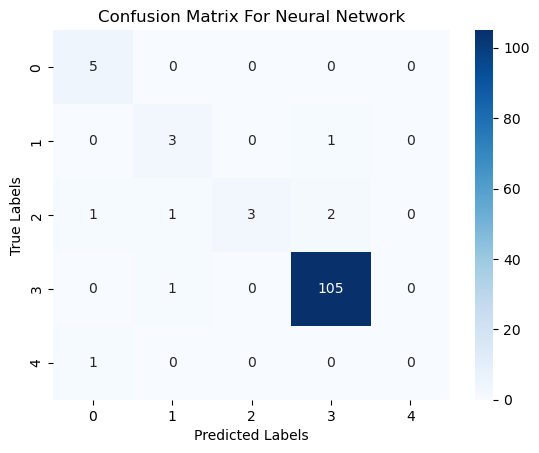

In [120]:
sns.heatmap(N_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Neural Network')
plt.show()

# going with SVM as the final model. 

In [122]:
import joblib

joblib.dump(best_model, 'svm_model.pkl')

['svm_model.pkl']